<a href="https://colab.research.google.com/github/yashvardhan751/RainFall_Prediction_Model/blob/main/RainFall_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RainFall-Prediction Model**


Steps


1.Data Collection
2.EDA
3.Data Preprocessing
4.Train_Test_Split
5.RandomForestClassifier
6.Hyperparameter tuning
7.Unknown Data
8.Trained Model  
9.Prediction


In [ ]:
#Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import  pickle

**Data Collections and Processing**

In [2]:
#load  the dataset
data=pd.read_csv('/content/Rainfall (1).csv')


In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.shape

(366, 12)

In [5]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [7]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [8]:
print("Data Info:-")
data.info()

Data Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [9]:
#remove extra spaces of all coloumn
data.columns=data.columns.str.strip()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
data=data.drop(columns=["day"])


In [12]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [13]:
#checking for missing values
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [14]:
#handle the missing the value
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [15]:
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].median())

In [16]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [17]:
#CONVERTING YES AND NO TO 1 AND 0
data["rainfall"]=data["rainfall"].map({"yes":1,"no":0})

In [18]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


**Exploratory Data Analysis**

In [19]:
data.shape

(366, 11)

In [20]:
#setting plots style for all the plots
sns.set(style="whitegrid")


In [21]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [22]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

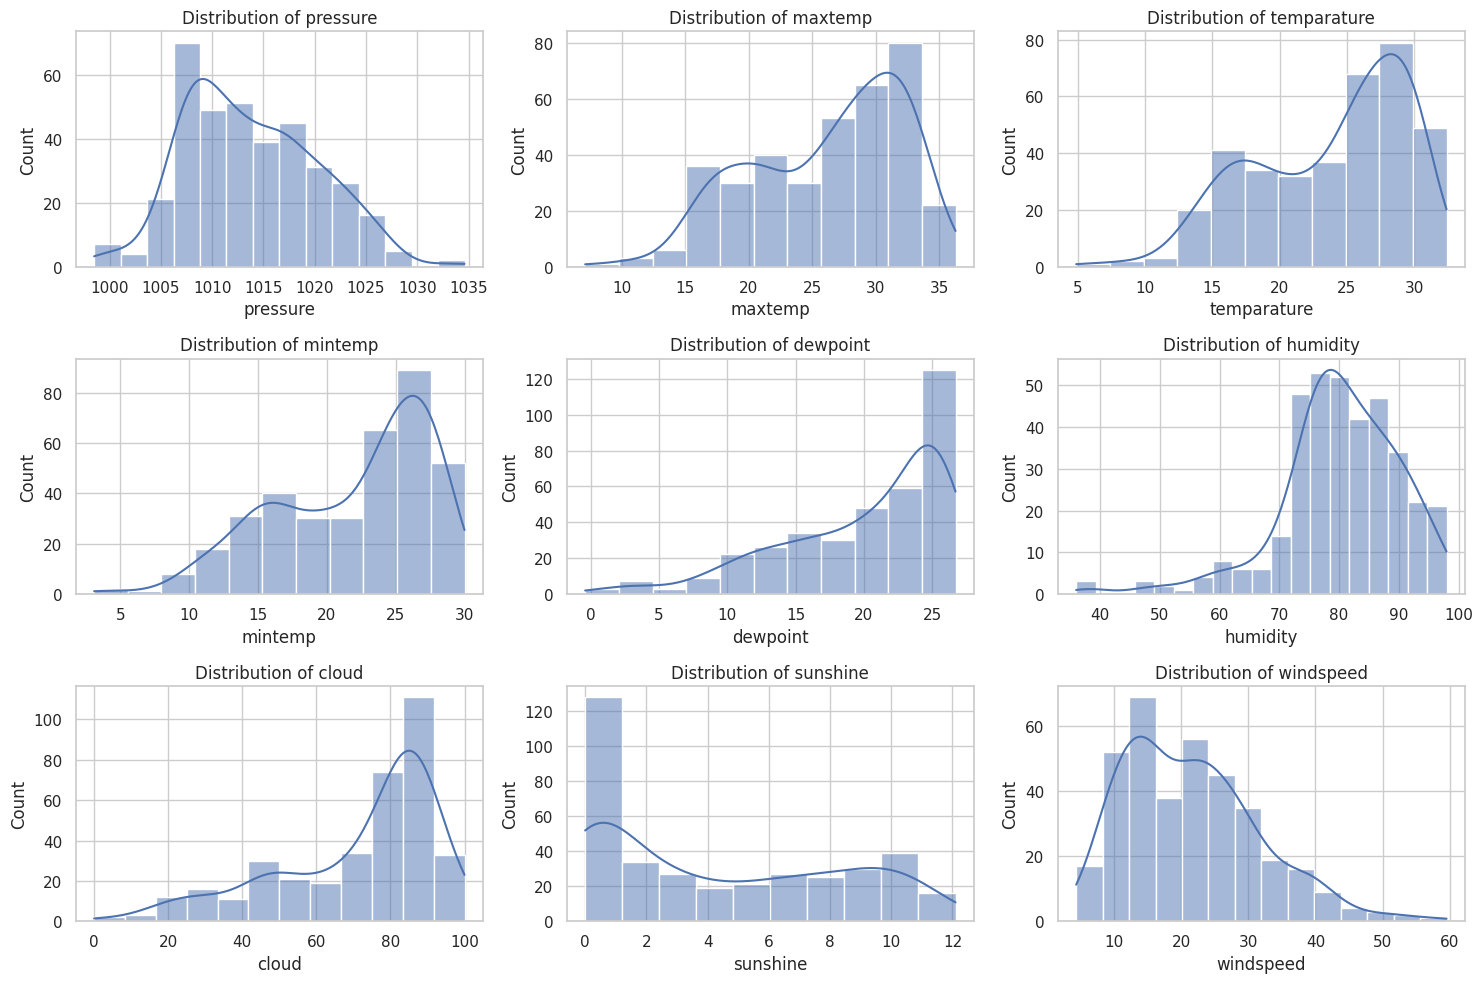

In [23]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud',  'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.histplot(data[column],kde=True)
  plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()




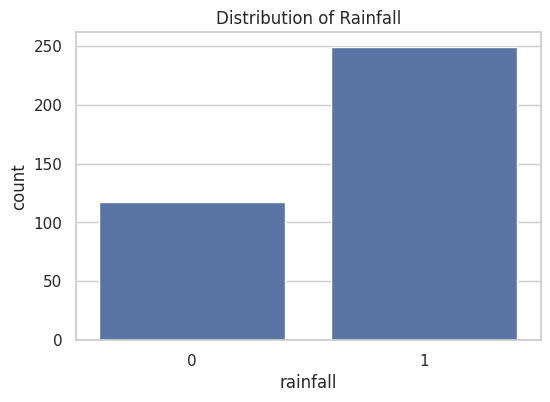

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data)
plt.title("Distribution of Rainfall")
plt.show()

NOTES:Dekh tree based h so standarisation nhi karege + q ki rainfall ka graph me dekh itna variation h so ye thik nhi model ko feed karne ki liye ,therefore,Downsampling karege

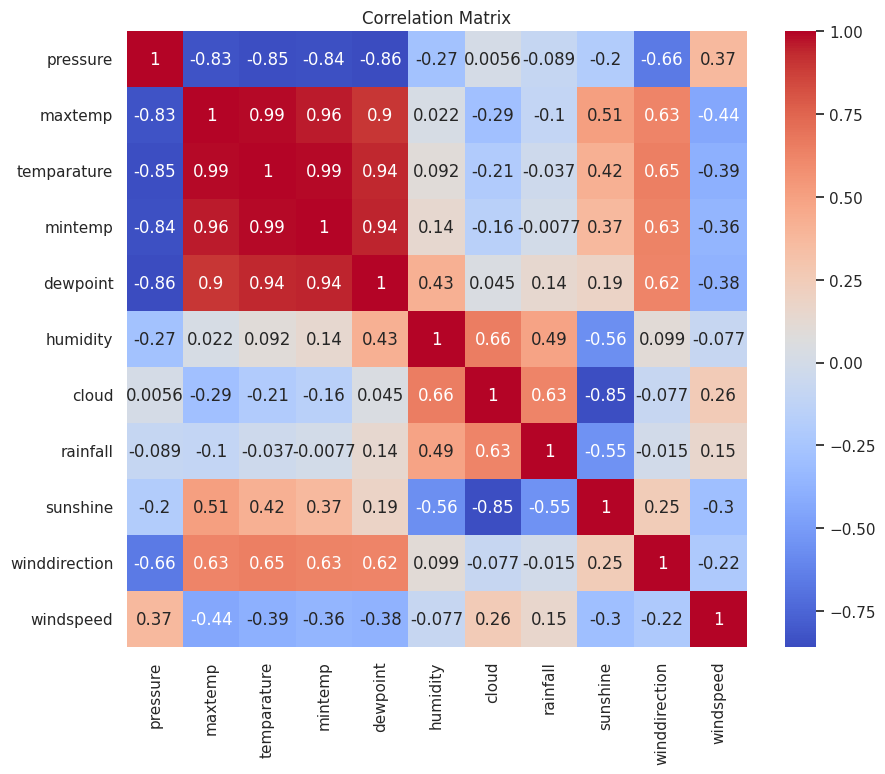

In [26]:
#correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


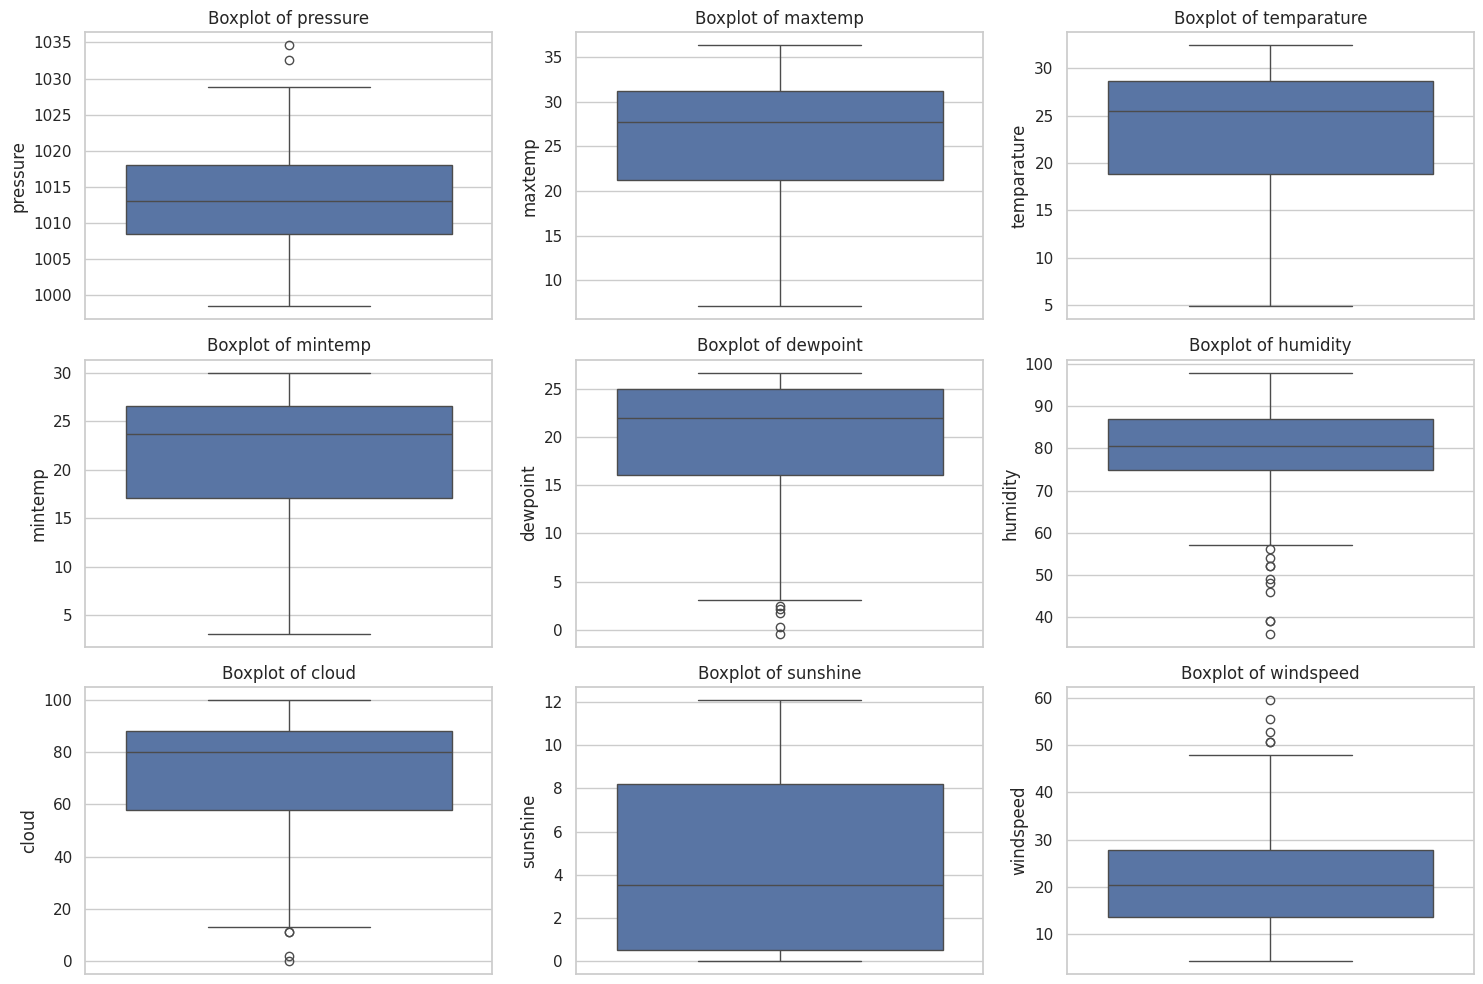

In [27]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud',  'sunshine', 'windspeed'],1):
  plt.subplot(3,3,i)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

**Data Prepossessing**

In [28]:
#drop highly correlated columns
data=data.drop(columns=["maxtemp","mintemp","temparature"])

In [29]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [30]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [31]:
#separate mojority and minority class
df_majority=data[data["rainfall"]==1]
df_minority=data[data["rainfall"]==0]

In [32]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [34]:
#downsample majority to match minority count
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [35]:
df_majority_downsampled.shape

(117, 8)

In [37]:
df_downsampled=pd.concat([df_majority_downsampled,df_majority])

In [38]:
df_downsampled.shape

(366, 8)

In [39]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [41]:
#shuffle the final dataframe
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [42]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1014.6,19.5,88,89,1,0.2,40.0,20.9
1,1007.4,25.1,90,88,1,0.2,210.0,12.9
2,1017.0,22.9,84,58,1,5.9,70.0,22.1
3,1015.2,25.4,93,88,1,0.9,100.0,37.0
4,998.5,24.8,71,80,1,10.0,220.0,26.4


In [43]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,366


In [44]:
#split featues and target as x and y
x=df_downsampled.drop(columns=["rainfall"])
y=df_downsampled["rainfall"]

In [45]:
print(x)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1014.6      19.5        88     89       0.2           40.0       20.9
1      1007.4      25.1        90     88       0.2          210.0       12.9
2      1017.0      22.9        84     58       5.9           70.0       22.1
3      1015.2      25.4        93     88       0.9          100.0       37.0
4       998.5      24.8        71     80      10.0          220.0       26.4
..        ...       ...       ...    ...       ...            ...        ...
361    1017.2      21.6        82     73       1.1           80.0       30.6
362    1008.1      25.4        86     75       5.7           20.0        9.5
363    1005.1      24.9        74     47      10.4           50.0       14.1
364    1018.4      15.8        85     91       0.1           70.0       41.3
365    1005.0      26.1        87     82       2.2          160.0       12.6

[366 rows x 7 columns]


In [46]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    1
Name: rainfall, Length: 366, dtype: int64


In [48]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [49]:
rf_model=RandomForestClassifier(random_state=42)
param_grid_rf={
    "n_estimators":[50,100,200],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features":["sqrt","log2"]

}

In [51]:
#Hypertuning using gridsearchcv
grid_search_rf=GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [53]:
best_rf_model=grid_search_rf.best_estimator_
print("best parameters for random forest model:",grid_search_rf.best_params_)


best parameters for random forest model: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


**Model Evaluation**

In [55]:
cv_scores=cross_val_score(best_rf_model,x_train,y_train,cv=5)
print("cross validation scores for random forest model:",cv_scores)
print("mean cross validation score:",np.mean(cv_scores))

cross validation scores for random forest model: [1. 1. 1. 1. 1.]
mean cross validation score: 1.0
